In [13]:
import pandas as pd
import numpy as np

try:
    df = pd.read_csv('Training.csv')
    print(f"Data loaded: {df.shape[0]} rows and {df.shape[1]} columns")
except FileNotFoundError:
    print("File not loaded !!!")


import warnings
warnings.filterwarnings("ignore")

Data loaded: 4920 rows and 134 columns


#### Performing Exploratory Data Analysis

In [2]:
df.isnull().sum().sum()

np.int64(4920)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB
None


In [4]:
if 'Unnamed: 133' in df.columns:
    df = df.drop('Unnamed: 133', axis=1)


In [5]:
## Check for missing values
print(f" The number of missing values found : {df.isnull().sum().sum()}")

 The number of missing values found : 0


In [6]:
print("Class Distribution")
print(df['prognosis'].value_counts())

Class Distribution
prognosis
Fungal infection                           120
Allergy                                    120
GERD                                       120
Chronic cholestasis                        120
Drug Reaction                              120
Peptic ulcer diseae                        120
AIDS                                       120
Diabetes                                   120
Gastroenteritis                            120
Bronchial Asthma                           120
Hypertension                               120
Migraine                                   120
Cervical spondylosis                       120
Paralysis (brain hemorrhage)               120
Jaundice                                   120
Malaria                                    120
Chicken pox                                120
Dengue                                     120
Typhoid                                    120
hepatitis A                                120
Hepatitis B                    

Text(0, 0.5, 'Frequency')

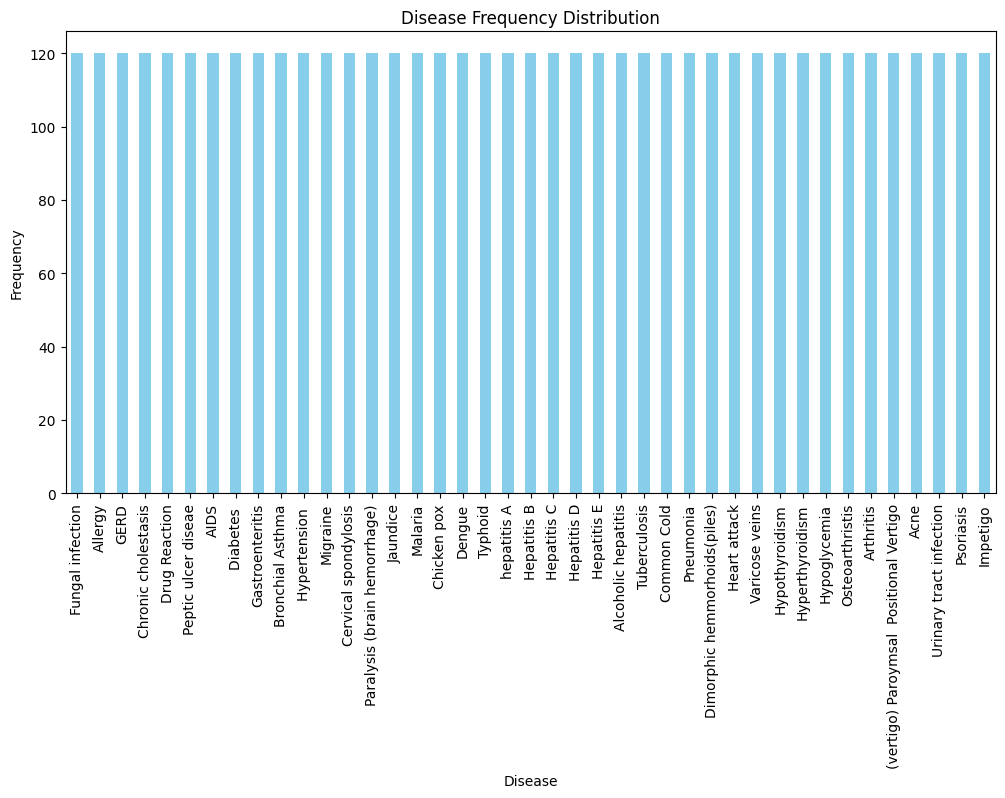

In [7]:
## Visualize disease distribution
plt.figure(figsize=(12,6))
df['prognosis'].value_counts().plot(kind='bar',color='skyblue')
plt.title('Disease Frequency Distribution')
plt.xticks(rotation=90)
plt.xlabel('Disease')
plt.ylabel('Frequency')



Text(0, 0.5, 'Symptoms')

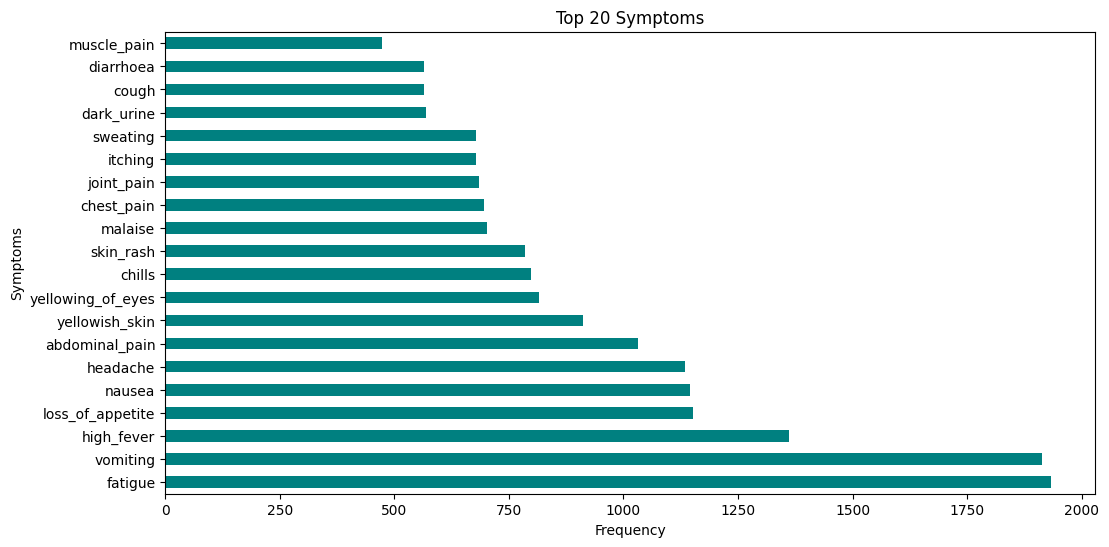

In [8]:
## System frequnecy distribution
symptoms = df.drop('prognosis', axis=1).sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
symptoms[:20].plot(kind = 'barh',color='teal')
plt.title('Top 20 Symptoms')
plt.xlabel('Frequency')
plt.ylabel('Symptoms')

#### Feature Engineering and Preprocessing

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
df['label'] = le.fit_transform(df['prognosis'])

In [10]:
## Split the features and target variable
X = df.drop(['prognosis','label'],axis = 1)
y = df['label']

## Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (3936, 132)
Testing set size: (984, 132)


#### Model Training 

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [14]:
models = [
    ('Logistic Regression', LogisticRegression(C=0.1, penalty='l2', solver='liblinear', max_iter=200)),
    ('SVM', SVC(C=0.5, kernel='rbf', gamma='scale', probability=True)),
    ('KNN', KNeighborsClassifier(n_neighbors=5, weights='distance', p=2)),
    ('GaussianNB', GaussianNB(var_smoothing=1e-9)),
    ('BernoulliNB', BernoulliNB(alpha=1.0)),
    ('Decision Tree', DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=10, min_samples_leaf=4, random_state=42)),
    ('AdaBoost', AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)),
    ('Bagging', BaggingClassifier(n_estimators=100, max_samples=0.8, max_features=0.8, random_state=42)),
    ('Extra Trees', ExtraTreesClassifier(n_estimators=100, max_depth=7, min_samples_split=10, min_samples_leaf=4, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, subsample=0.8, random_state=42))
]

for name,model in models:
    pipleline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    pipleline.fit(X_train,y_train)
    y_pred = pipleline.predict(X_test)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)
    print("\n\n")

Model: Logistic Regression
Accuracy: 1.0
Precision: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        19
          16       1.00  

## Hyperparameter Tuning in RandomForest

In [ ]:
## We Can see that the Random Forest Classifier has the highest accuracy and precision score.
## We will apply hyperparameter tuning on it.
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid,
                           cv=5)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
best_rf = grid_search.best_estimator_
print(f"Tuned Accuracy: {best_rf.score(X_test, y_test):.4f}")


Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Accuracy: 1.0000


In [ ]:
# 1. Train your final model (example with RandomForest)
best_model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2)
best_model.fit(X_train, y_train)

test_df = pd.read_csv('Testing.csv')

# 3. Drop unwanted columns
columns_to_drop = ['Unnamed: 133', 'prognosis']
for col in columns_to_drop:
    if col in test_df.columns:
        test_df = test_df.drop(col, axis=1)

# 4. Predict
predictions = best_model.predict(test_df)

# 5. Decode labels
predicted_diseases = le.inverse_transform(predictions)

# 6. Output predictions
print(predicted_diseases)

# 7. Save to CSV
submission = pd.DataFrame({'Predicted Disease': predicted_diseases})
submission.to_csv('final_predictions.csv', index=False)


['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo' 'Chicken pox']
